Step 1: Import Necessary Libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats

# Example: Load your data into a DataFrame
df = pd.read_csv('linear_least_sq_fit.csv')

# Assuming df has columns 'logRBA' and 'docking_score'
X = df['docking_score'].values.reshape(-1, 1)  # Independent variable (docking scores)
y = df['logRBAemp'].values  # Dependent variable (experimental logRBA)


Step 2: Perform Linear Regression

In [21]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept of the regression line
intercept = model.intercept_
slope = model.coef_[0]

print(f"Linear Regression Equation: logRBA = {intercept:.3f} + {slope:.3f} * docking_score")

Linear Regression Equation: logRBA = -0.645 + -0.033 * docking_score


Step 3: Calculate the p-value

In [22]:
# Perform statistical analysis to calculate the p-value
slope, intercept, r_value, p_value, std_err = stats.linregress(df['docking_score'], df['logRBAemp'])

print(f"p-value: {p_value:.3f}")

p-value: 0.016


Step 4: Predict logRBA Values Using the Model

In [23]:
# Use the model to predict logRBA values
df['predicted_logRBA'] = model.predict(X)

# Calculate correlation between predicted and experimental logRBA
correlation_coefficient = np.corrcoef(df['logRBAemp'], df['predicted_logRBA'])[0, 1]

print(f"Correlation coefficient between predicted and experimental logRBA: {correlation_coefficient:.3f}")

Correlation coefficient between predicted and experimental logRBA: 0.610


In [24]:
# Save the DataFrame with predicted values to a CSV file
df.to_csv('predicted_logRBA.csv', index=False)

In [25]:
import pandas as pd

# Load the new dataset
new_df = pd.read_csv('dockingscore_to_logRBA_test.csv')

# Extract the docking scores
X_new = new_df['docking_score'].values.reshape(-1, 1)

# Use the trained model to predict logRBA values
new_df['predicted_logRBA'] = model.predict(X_new)

# Save the predictions to a CSV file
new_df.to_csv('predicted_logRBA_new_data.csv', index=False)

# Optional: Display the first few rows of the new dataset with predictions
print(new_df.head())


   docking_score  predicted_logRBA
0         -61.70          1.390544
1         -63.61          1.453552
2         -53.19          1.109813
3         -52.71          1.093978
4         -54.59          1.155997


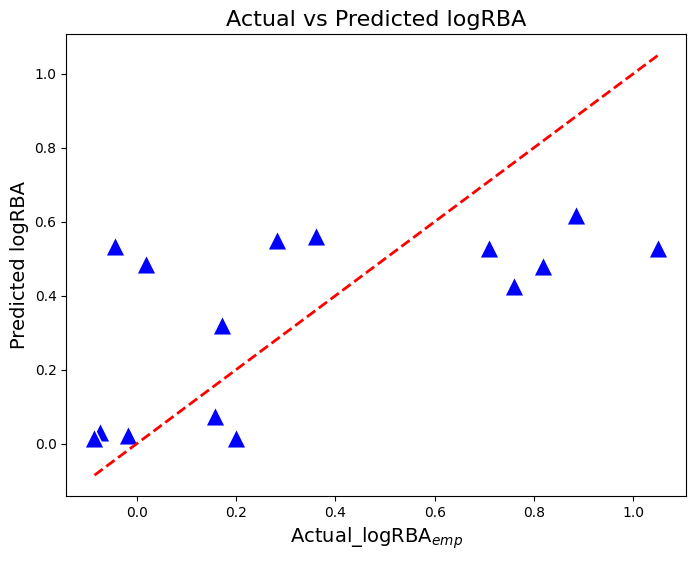

Mean Squared Error: 0.090
R^2 Score: 0.373


<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your original DataFrame with actual and predicted logRBA values
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs. predicted logRBA
sns.scatterplot(x=df['logRBAemp'], y=df['predicted_logRBA'], data=df, marker='^', s=200, color='blue')

# Add a diagonal line for reference (y = x)
plt.plot([df['logRBAemp'].min(), df['logRBAemp'].max()],
         [df['logRBAemp'].min(), df['logRBAemp'].max()],
         color='red', linestyle='--', linewidth=2)

# Add titles and labels
plt.title('Actual vs Predicted logRBA', fontsize=16)
plt.xlabel(r'Actual_logRBA$_{emp}$', fontsize=14)
plt.ylabel('Predicted logRBA', fontsize=14)
#plt.grid(True)

# Show the plot
plt.show()

# Save the plot as a .jpeg file
plt.savefig('actual_vs_pred_logRBA.jpeg', format='jpeg', dpi=300, bbox_inches='tight')

# Print out metrics for further analysis
mse = mean_squared_error(df['logRBAemp'], df['predicted_logRBA'])
r2 = r2_score(df['logRBAemp'], df['predicted_logRBA'])

print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")